__<font size=6><font color=brown>Low back pain among medical students in Bangladesh__

<p><a href="https://www.physio-pedia.com/File:Back_pain_image.jpg#/media/File:Back_pain_image.jpg"><img src="https://www.physio-pedia.com/images/a/af/Back_pain_image.jpg" alt="Back pain image.jpg"></a><br><a href="https://www.physio-pedia.com/index.php?curid=14207">Link</a></p>

In [690]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [691]:
url="https://raw.githubusercontent.com/royohana31/nn-project-/main/Raw%20dataset%20(2).csv"
spine_df=pd.read_csv(url,on_bad_lines='skip')
spine_df['LBP_12months']

0      NaN
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
203     No
204     No
205     No
206    Yes
207     No
Name: LBP_12months, Length: 208, dtype: object

__lets fix it a bit__

In [692]:
spine_df=spine_df.drop(0)

In [693]:
spine_df["Educational_level"].unique()

array(['Medical interns', '1st year', '4th year', 'Final year',
       '3rd year', '2nd year'], dtype=object)

In [694]:
spine_df["Educational_level"].replace({"Final year":"last_year",'4th year':"last_year",'Medical interns':"intenrns"},inplace=True)

In [695]:
spine_df["Educational_level"].value_counts()

Educational_level
last_year    75
intenrns     40
1st year     31
2nd year     31
3rd year     30
Name: count, dtype: int64

In [696]:
spine_df["Sitting_time"].replace({'< 6 hours':"less_than_6",'? 6 hours':"above_6"},inplace=True)

In [697]:
spine_df["Sitting_time"].unique()

array(['less_than_6', 'above_6'], dtype=object)

In [698]:
spine_df.rename(columns={"Height (m)":"Height"},inplace=True)

In [699]:
spine_df["Educational_level"].unique()

array(['intenrns', '1st year', 'last_year', '3rd year', '2nd year'],
      dtype=object)

In [700]:
spine_df.drop(columns=["Age_group","BMI",])

,Educational_level,Gender,Age,Height,Weight (kg),BMI_Range,Currently_LBP,LBP_6months,LBP_12months,LBP_first_time,...,Treatments,Do_exercise,Physical_activity_Frequency,Smoking_habit,Sitting_time,Chair_type,Adjustable_back,Adjustable_sitting,Most_activity,Rest_time
1,intenrns,Male,24.0,1.80,90.0,2,No,Yes,Yes,Medical,...,No treatment,5 - 7 times a week,High,Smoker,less_than_6,No back support,No,No,Sitting,Yes
2,intenrns,Male,24.0,2.00,74.0,1,Yes,Yes,Yes,Medical,...,Opioid painkillers,2 - 4 times a week,Moderate,Never smoked,above_6,No back support,No,Yes,Bending,Yes
3,intenrns,Female,23.0,1.60,54.0,1,Yes,Yes,Yes,Medical,...,Opioid+Exercise,2 - 4 times a week,Moderate,Never smoked,less_than_6,Have back support,No,No,Sitting,Yes
4,intenrns,Male,24.0,1.80,78.0,1,Yes,Yes,Yes,Medical,...,No treatment,Once a week,Moderate,Ex-smoker,less_than_6,Have back support,No,Yes,No task for long time,Yes
5,intenrns,Female,24.0,1.60,50.0,1,Yes,Yes,Yes,Internship,...,Opioid painkillers,Rarely,Low,Never smoked,less_than_6,No back support,No,No,Standing or walking,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1st year,Male,20.0,1.63,65.0,1,No,No,No,NaN,...,NaN,>7 times a week,High,Never smoked,less_than_6,Have back support,Yes,Yes,No task for long time,Yes
204,2nd year,Female,22.0,1.56,57.0,1,No,No,No,Medical,...,Opioid painkillers,5 - 7 times a week,High,Never smoked,less_than_6,Have back support,Yes,No,No task for long time,Yes
205,3rd year,Female,21.0,1.60,65.0,2,No,No,No,NaN,...,NaN,5 - 7 times a week,High,Never smoked,less_than_6,Have back support,Yes,Yes,No task for long time,Yes
206,2nd year,Male,20.0,1.60,62.0,1,No,Yes,Yes,Medical,...,No treatment,Once a week,Moderate,Smoker,above_6,No back support,No,No,Sitting,No


In [701]:
spine_df['LBP_first_time'].fillna("unreported", inplace=True)
spine_df['Duration_in_12_months'].fillna("unreported", inplace=True)
spine_df['LBP_episodes'].fillna("unreported", inplace=True)
spine_df['Causes'].fillna("unreported", inplace=True)
spine_df['Aggravating_factors'].fillna("unreported", inplace=True)
spine_df['Leg_pain'].fillna("unreported", inplace=True)
spine_df['Treatments'].fillna("unreported", inplace=True)
spine_df.isnull().sum()

Educational_level              0
Gender                         0
Age                            0
Age_group                      0
Height                         0
Weight (kg)                    0
BMI                            0
BMI_Range                      0
Currently_LBP                  0
LBP_6months                    0
LBP_12months                   0
LBP_first_time                 0
Duration_in_12_months          0
LBP_episodes                   0
Causes                         0
Aggravating_factors            0
Leg_pain                       0
Treatments                     0
Do_exercise                    0
Physical_activity_Frequency    0
Smoking_habit                  0
Sitting_time                   0
Chair_type                     0
Adjustable_back                0
Adjustable_sitting             0
Most_activity                  0
Rest_time                      0
dtype: int64

In [702]:
spine_df.dtypes

Educational_level               object
Gender                          object
Age                            float64
Age_group                       object
Height                         float64
Weight (kg)                    float64
BMI                            float64
BMI_Range                       object
Currently_LBP                   object
LBP_6months                     object
LBP_12months                    object
LBP_first_time                  object
Duration_in_12_months           object
LBP_episodes                    object
Causes                          object
Aggravating_factors             object
Leg_pain                        object
Treatments                      object
Do_exercise                     object
Physical_activity_Frequency     object
Smoking_habit                   object
Sitting_time                    object
Chair_type                      object
Adjustable_back                 object
Adjustable_sitting              object
Most_activity            

dummies for correlation check

In [703]:
dummies=pd.get_dummies(spine_df,columns=["LBP_12months",'BMI_Range','Educational_level','Physical_activity_Frequency','Gender','Rest_time','Most_activity','Leg_pain','Currently_LBP','Duration_in_12_months','Chair_type','Adjustable_sitting','LBP_episodes','Sitting_time','Smoking_habit','Do_exercise','Aggravating_factors','LBP_first_time'])
dummies.columns

Index(['Age', 'Age_group', 'Height', 'Weight (kg)', 'BMI', 'LBP_6months',
       'Causes', 'Treatments', 'Adjustable_back', 'LBP_12months_No',
       'LBP_12months_Yes', 'BMI_Range_1', 'BMI_Range_2',
       'Educational_level_1st year', 'Educational_level_2nd year',
       'Educational_level_3rd year', 'Educational_level_intenrns',
       'Educational_level_last_year', 'Physical_activity_Frequency_High',
       'Physical_activity_Frequency_Low',
       'Physical_activity_Frequency_Moderate', 'Gender_Female', 'Gender_Male',
       'Rest_time_No', 'Rest_time_Yes', 'Most_activity_Bending',
       'Most_activity_No task for long time', 'Most_activity_Sitting',
       'Most_activity_Standing or walking', 'Leg_pain_No', 'Leg_pain_Not sure',
       'Leg_pain_Yes', 'Leg_pain_unreported', 'Currently_LBP_No',
       'Currently_LBP_Yes', 'Duration_in_12_months_1',
       'Duration_in_12_months_2', 'Duration_in_12_months_3',
       'Duration_in_12_months_4', 'Duration_in_12_months_unreported',
   

תחילת מסקנה א-קשר בין מאפיינים גנטיים וביולוגיים וממשיים לכאב

<font size=5>__conclusion 1:The connection between genetics and biology on LBP among the students__

<Axes: >

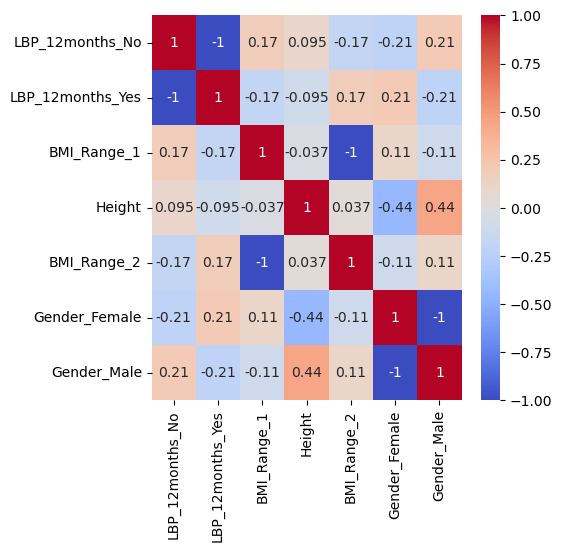

In [704]:
selected=dummies[['LBP_12months_No','LBP_12months_Yes',
       'BMI_Range_1',"Height", 'BMI_Range_2', 'Gender_Female', 'Gender_Male']]
corr_matrix=selected.corr(method="kendall")
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot = True)


<font size=3>we can understand there is a connenction about being a female and have LBP and about BMI of group 2 and suffer from LBP,lets check it

<set style>__Gender and LBP__

In [705]:
spine_df["Gender"].value_counts()

Gender
Female    115
Male       92
Name: count, dtype: int64

In [706]:
spine_df.groupby(["Gender"])['LBP_12months'].value_counts().reset_index()

,Gender,LBP_12months,count
0,Female,Yes,83
1,Female,No,32
2,Male,Yes,48
3,Male,No,44


connection between gender and LBP

In [707]:
spine_df['LBP_12monthsbool'] = spine_df['LBP_12months'].map({'Yes': 1, 'No':0 })
spine_df['LBP_12monthsbool']



1      1
2      1
3      1
4      1
5      1
      ..
203    0
204    0
205    0
206    1
207    0
Name: LBP_12monthsbool, Length: 207, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\2686088020.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=spine_df, x="Gender", y="LBP_12monthsbool",ax=ax[2],ci=None)


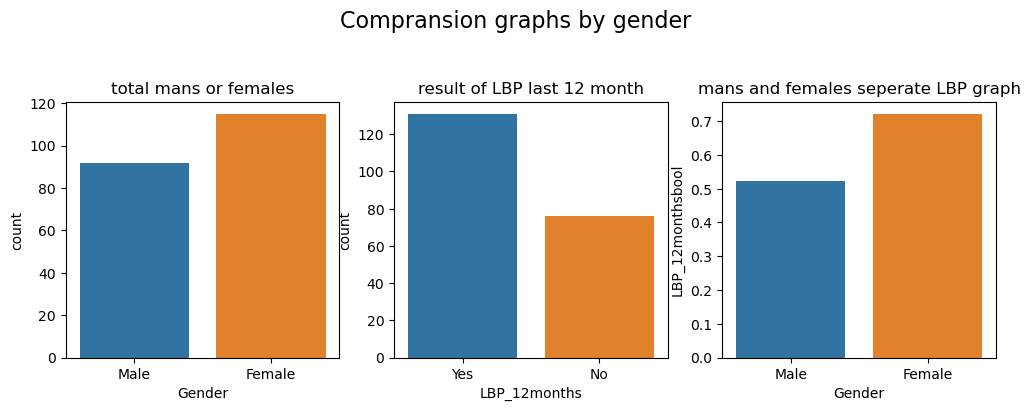

In [708]:
fig, ax = plt.subplots(1,3,figsize=(12, 4))
sns.countplot(data=spine_df,x='LBP_12months',ax=ax[1])
ax[1].set_title("result of LBP last 12 month")
sns.countplot(data=spine_df,x="Gender",ax=ax[0])
ax[0].set_title("total mans or females")
counts = spine_df.groupby("Gender")['LBP_12months'].value_counts().reset_index()
sns.barplot(data=spine_df, x="Gender", y="LBP_12monthsbool",ax=ax[2],ci=None)
ax[2].set_title("mans and females seperate LBP graph")
fig.suptitle('Compransion graphs by gender',size=16)
plt.subplots_adjust(top=0.75)





In [709]:
spine_df.groupby('Gender')["LBP_12months"].value_counts()

Gender  LBP_12months
Female  Yes             83
        No              32
Male    Yes             48
        No              44
Name: count, dtype: int64

<font size=4>__subconclusion:more females suffer relatively from LBP among the students.__


<font size=5>__height and spine pain__

(1.5, 2.04)

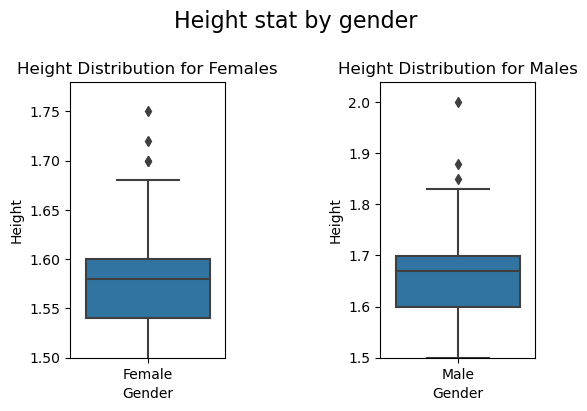

In [710]:
females=spine_df[spine_df["Gender"]=="Female"]
males=spine_df[spine_df["Gender"]=="Male"]
fig, ax = plt.subplots(1,2,figsize=(6, 4))
sns.boxplot(data=males,x='Gender',y="Height",ax=ax[1])
sns.boxplot(data=females,x='Gender',y="Height",ax=ax[0])
ax[0].set_title('Height Distribution for Females')
ax[1].set_title('Height Distribution for Males')
plt.subplots_adjust(wspace=1)
fig.suptitle('Height stat by gender',size=16)
plt.subplots_adjust(top=0.8)
ax[0].set_ylim(1.50, None)
ax[1].set_ylim(1.50, None)





In [711]:
filteredmales = males[males.groupby('Height')['Height'].transform('count') > 3]
filteredmales["Height"].value_counts()



Height
1.70    16
1.60    12
1.63     6
1.67     6
1.80     5
1.68     5
1.73     5
1.64     4
1.65     4
Name: count, dtype: int64

In [712]:
filteredfemales = females[females.groupby('Height')['Height'].transform('count') > 3]
filteredfemales["Height"].value_counts()

Height
1.60    15
1.52    14
1.58    10
1.57     9
1.54     9
1.65     9
1.59     7
1.55     7
1.50     6
1.63     6
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\3662650315.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=females,x="Height",y='LBP_12monthsbool',ax=ax[0,1],ci=None,)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\3662650315.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=males,x="Height",y='LBP_12monthsbool',ax=ax[1,1],ci=None,)


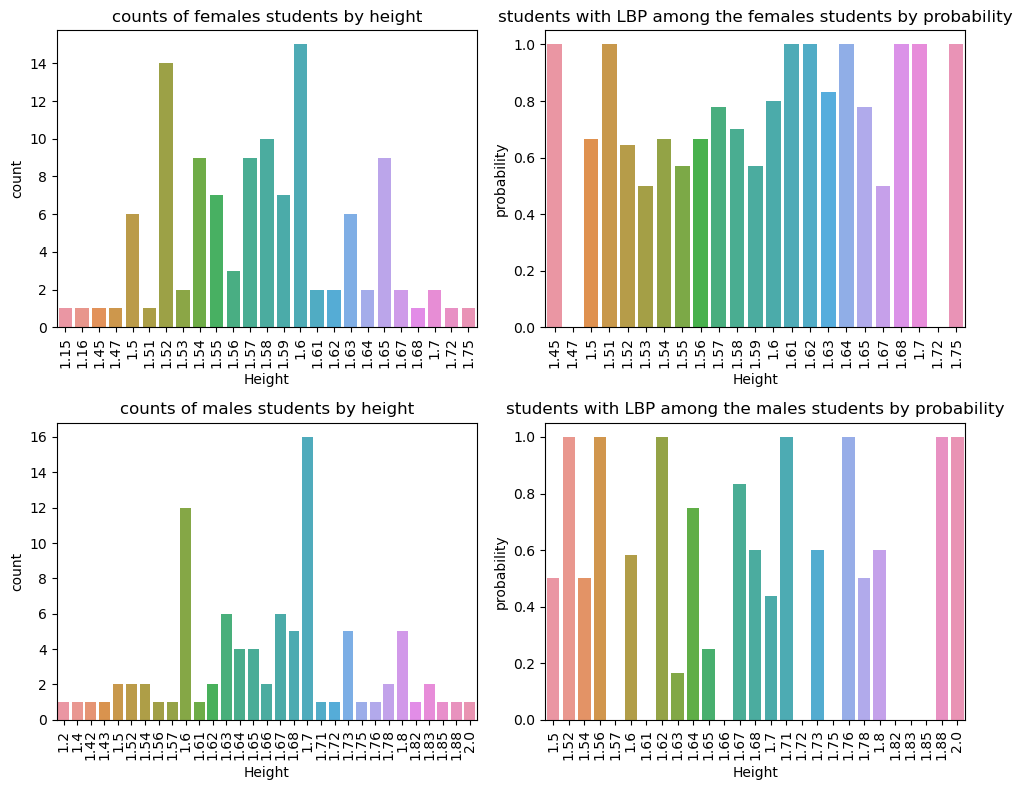

In [713]:

fig, ax = plt.subplots(2,2,figsize=(10, 8))
sns.countplot(data=females,x='Height',ax=ax[0,0])
sns.countplot(data=males,x='Height',ax=ax[1,0])
males=males[males['Height']>=1.5]
females=females[females['Height']>=1.45]
sns.barplot(data=females,x="Height",y='LBP_12monthsbool',ax=ax[0,1],ci=None,)
sns.barplot(data=males,x="Height",y='LBP_12monthsbool',ax=ax[1,1],ci=None,)
ax[1,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[0,0].set_title("counts of females students by height")
ax[0,1].set_title("students with LBP among the females students by probability")
ax[1,0].set_title("counts of males students by height")
ax[1,1].set_title("students with LBP among the males students by probability")
ax[0,1].set_ylabel("probability")
ax[1,1].set_ylabel("probability")


plt.subplots_adjust(wspace=0.7, hspace=0.7)  # Adjust the spacing between subplots

plt.tight_layout()









<Axes: xlabel='Height', ylabel='LBP_12monthsbool'>

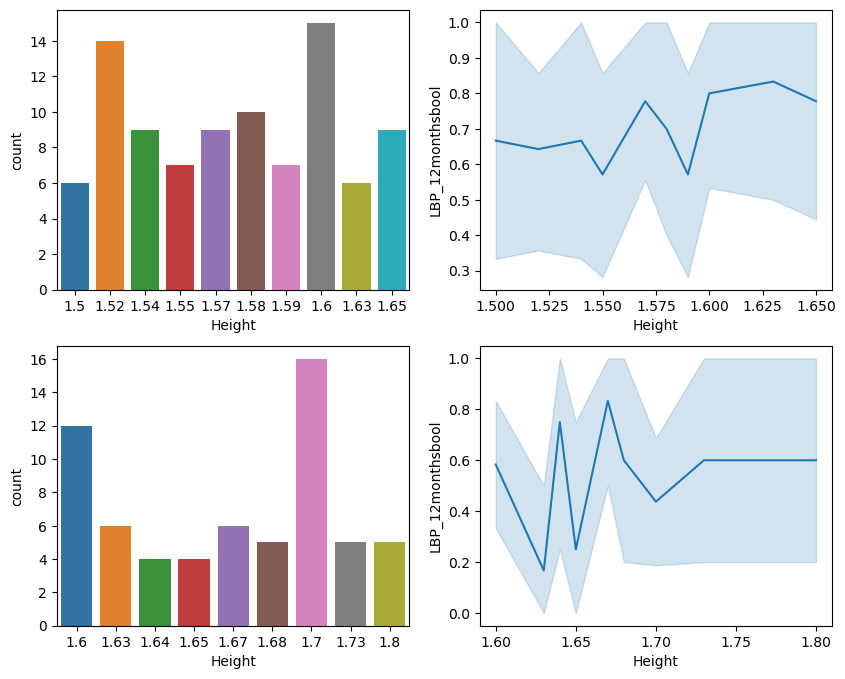

In [714]:
fig, ax = plt.subplots(2,2,figsize=(10, 8))
sns.countplot(data=filteredfemales,x='Height',ax=ax[0,0])
sns.lineplot(data=filteredfemales, x="Height", y='LBP_12monthsbool', ax=ax[0, 1])
sns.countplot(data=filteredmales,x='Height',ax=ax[1,0])
sns.lineplot(data=filteredmales, x="Height", y='LBP_12monthsbool', ax=ax[1, 1])


<font size=4,font color=blue> Height have no effect on the probability to have LBP

<font size=5>BMI "range" "and" spine pain  

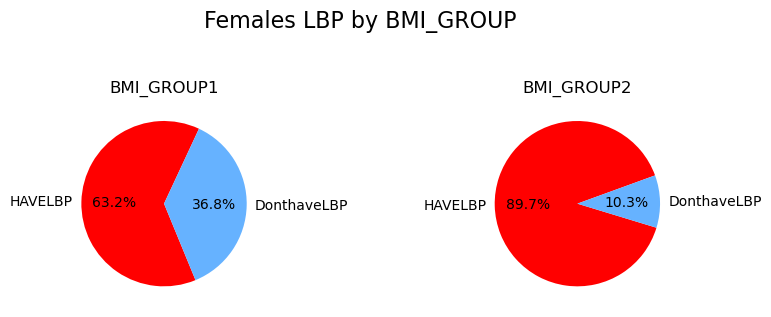

In [715]:

FBMI1=spine_df[(spine_df['Gender']=="Female")&(spine_df['BMI_Range']=='1')]
size1=FBMI1['LBP_12months'].value_counts()
FBMI2=spine_df[(spine_df['Gender']=="Female")&(spine_df['BMI_Range']=='2')]
size2=FBMI2['LBP_12months'].value_counts()
fig, ax = plt.subplots(1,2,figsize=(8, 4))
ax[0].pie(size1, labels=["HAVELBP",'DonthaveLBP'],autopct='%1.1f%%',colors=["red","#66B2FF"],startangle=65)
ax[0].set_title("BMI_GROUP1")
ax[1].pie(size2, labels=["HAVELBP",'DonthaveLBP'], autopct='%1.1f%%',colors=['red', '#66B2FF'],startangle=20)
ax[1].set_title("BMI_GROUP2")
fig.suptitle('Females LBP by BMI_GROUP', fontsize=16)
plt.subplots_adjust(wspace=1)

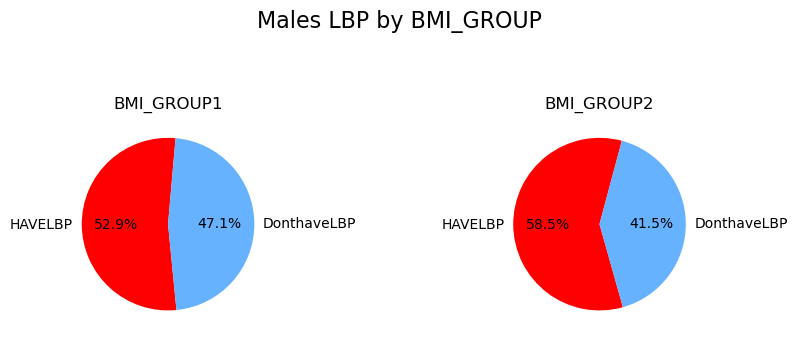

In [716]:
MBMI1=spine_df[(spine_df['Gender']=="Male")&(spine_df['BMI_Range']=='1')]
size3=MBMI1['LBP_12months'].value_counts()
MBMI2=spine_df[(spine_df['Gender']=="Male")&(spine_df['BMI_Range']=='2')]
size4=MBMI2['LBP_12months'].value_counts()
fig, ax = plt.subplots(1,2,figsize=(8, 4))
fig.suptitle('Males LBP by BMI_GROUP', fontsize=16)
ax[0].pie(size3, labels=["HAVELBP",'DonthaveLBP'], autopct='%1.1f%%',colors=["red",'#66B2FF'],startangle=85)
ax[1].pie(size4, labels=["HAVELBP",'DonthaveLBP'], autopct='%1.1f%%',colors=["red",'#66B2FF'],startangle=75)
ax[0].set_title("BMI_GROUP1")
ax[1].set_title("BMI_GROUP2")
plt.tight_layout()
plt.subplots_adjust(wspace=1)



<font size=4>__sub-conclusion__:____The"BMI_Range" has a big impact on Females students and normal impact among the Males students__

<font size=5,font color=blue>__main conclusion1 :Females are more likely to suffer from LBP among the students,height has no effect on LBP but BMI group has enormous impact on the probability

 <font size=6>__Conclusion 2:Does lifestyle effect the students LBP ?__

In [717]:
spine_df.groupby('Adjustable_back')["LBP_12months"].value_counts()

Adjustable_back  LBP_12months
No               Yes             104
                 No               31
Yes              No               45
                 Yes              27
Name: count, dtype: int64

In [718]:
spine_df["perfect_chair"] = (
    (spine_df["Chair_type"] == "Have back support") &
    (spine_df["Adjustable_back"] == "Yes") &
    (spine_df["Adjustable_sitting"] == "Yes")
).apply(lambda x: "yes" if x else "no")

spine_df["semi_perfect"] = (((spine_df["Chair_type"] == "Have back support") & 
     (spine_df["Adjustable_back"] == "Yes") & 
     (spine_df["Adjustable_sitting"] == "No")) |
    ((spine_df["Chair_type"] == "No back support") & 
     (spine_df["Adjustable_back"] == "Yes") & 
     (spine_df["Adjustable_sitting"] == "Yes")) |
    ((spine_df["Chair_type"] == "Have back support") & 
     (spine_df["Adjustable_back"] == "No") & 
     (spine_df["Adjustable_sitting"] == "Yes"))
).apply(lambda x: "yes" if x else "no")
spine_df["semi_perfect"].value_counts()
spine_df.groupby('semi_perfect')["LBP_12months"].value_counts()



semi_perfect  LBP_12months
no            Yes             115
              No               64
yes           Yes              16
              No               12
Name: count, dtype: int64

<Axes: >

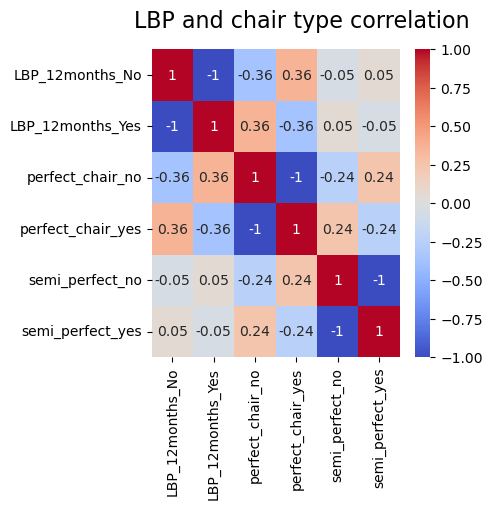

In [719]:
newdummi=pd.get_dummies(spine_df,columns=["perfect_chair",'semi_perfect',"LBP_12months"])
newdummi.columns
interest=['LBP_12months_No', 'LBP_12months_Yes','perfect_chair_no',
       'perfect_chair_yes', 'semi_perfect_no', 'semi_perfect_yes',]
matrix=newdummi[interest].corr()
fig, ax = plt.subplots(figsize=(4, 4))
fig.suptitle('LBP and chair type correlation', fontsize=16)

sns.heatmap(matrix, cmap='coolwarm', center=0, annot = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\1830195324.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=spine_df,x='semi_perfect',y="LBP_12monthsbool",ci=None)


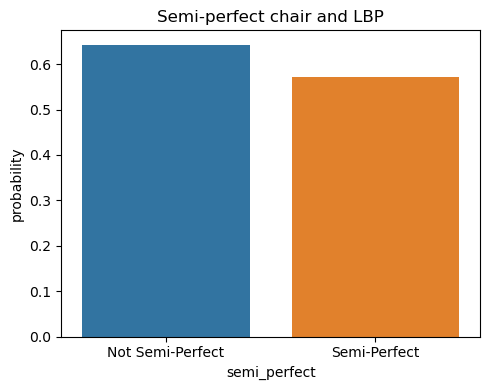

In [720]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(data=spine_df,x='semi_perfect',y="LBP_12monthsbool",ci=None)
ax.set_xticklabels(['Not Semi-Perfect', 'Semi-Perfect'])
ax.set_ylabel("probability")
ax.set_title("Semi-perfect chair and LBP")


plt.tight_layout()


In [721]:
spine_df["perfect_chair"].value_counts()

perfect_chair
no     150
yes     57
Name: count, dtype: int64

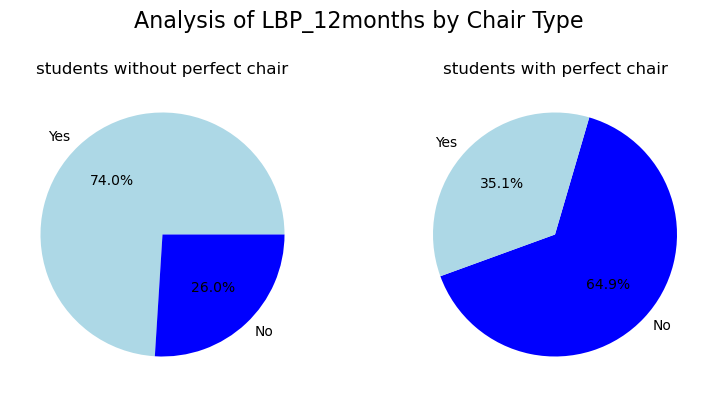

In [722]:
spine_df["perfect_chair"] = (
    (spine_df["Chair_type"] == "Have back support") &
    (spine_df["Adjustable_back"] == "Yes") &
    (spine_df["Adjustable_sitting"] == "Yes")
).apply(lambda x: "yes" if x else "no")

counts1=spine_df[spine_df["perfect_chair"]=='yes'].groupby("perfect_chair")["LBP_12months"].value_counts().reset_index()
counts2=spine_df[spine_df["perfect_chair"]=='no'].groupby("perfect_chair")["LBP_12months"].value_counts().reset_index()
counts1
counts1
fig, ax = plt.subplots(1,2,figsize=(8, 4))
fig.suptitle('Analysis of LBP_12months by Chair Type', fontsize=16)
ax[1].pie(counts1["count"], labels=counts1["LBP_12months"].unique(), autopct='%1.1f%%',colors=["blue","lightblue"],startangle=200 )
ax[1].set_title("students with perfect chair")
ax[0].pie(counts2["count"], labels=counts2["LBP_12months"].unique(), autopct='%1.1f%%',colors=["lightblue","blue"] ,)
ax[0].set_title("students without perfect chair")
plt.tight_layout()
plt.subplots_adjust(top=0.8)  # Adjust the top margin to make space for the main title





C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\394839980.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=spine_df,x='perfect_chair',y='LBP_12monthsbool',hue='semi_perfect',ax=ax[1],ci=None)


Text(0.5, 0.98, 'Comparison of LBP by Chair Type')

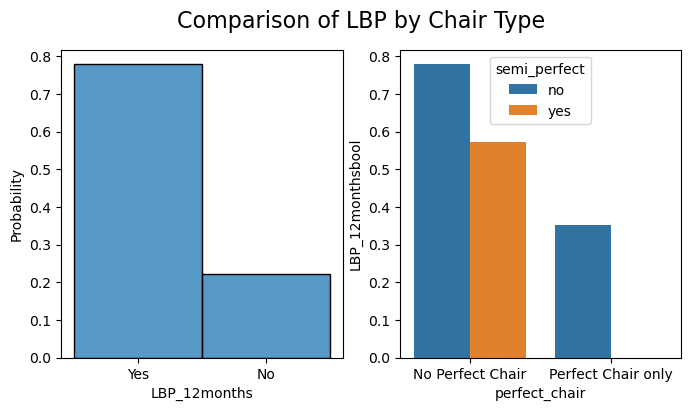

In [723]:
filtered=spine_df[(spine_df['semi_perfect']=="no")&(spine_df['perfect_chair']=='no')]
filtered2=spine_df[(spine_df['semi_perfect']=="yes")&(spine_df['perfect_chair']=='no')]
filtered3=spine_df[(spine_df['semi_perfect']=='no')&(spine_df['perfect_chair']=='yes')]
filtered3.shape
fig, ax = plt.subplots(1,2,figsize=(8, 4))
sns.histplot(data=filtered,x='LBP_12months',stat="probability",ax=ax[0])
sns.barplot(data=spine_df,x='perfect_chair',y='LBP_12monthsbool',hue='semi_perfect',ax=ax[1],ci=None)
ax[1].set_xticklabels(['No Perfect Chair', 'Perfect Chair only'])
fig.suptitle('Comparison of LBP by Chair Type', fontsize=16)


<font size=3>__sub-conclusion:we can understand that comfort chair decrease the chances to suffer__


In [724]:
conditions = [
    (spine_df["Do_exercise"] == '>7 times a week') & (spine_df['Physical_activity_Frequency'] == "High"),
    (spine_df["Do_exercise"] == '5 - 7 times a week') & (spine_df['Physical_activity_Frequency'] == "High"),
    (spine_df["Do_exercise"] == '2 - 4 times a week') & (spine_df['Physical_activity_Frequency'] == "Moderate"),
    (spine_df["Do_exercise"] == 'Never') & (spine_df['Physical_activity_Frequency'] == "Low"),
    (spine_df["Do_exercise"] == 'Once a week') & (spine_df['Physical_activity_Frequency'] == "Moderate"),
    ((spine_df["Do_exercise"] == 'Never')|(spine_df["Do_exercise"] == 'Rarely')) & (spine_df['Physical_activity_Frequency'] == "Low")
]
choices=['extremely_active','very_active','active','inactive','moderately_active','inactive']
spine_df["activness_level"] = np.select(conditions, choices,default="Unknown")



In [725]:
spine_df[spine_df["Do_exercise"]=="Rarely"].count()

Educational_level              74
Gender                         74
Age                            74
Age_group                      74
Height                         74
Weight (kg)                    74
BMI                            74
BMI_Range                      74
Currently_LBP                  74
LBP_6months                    74
LBP_12months                   74
LBP_first_time                 74
Duration_in_12_months          74
LBP_episodes                   74
Causes                         74
Aggravating_factors            74
Leg_pain                       74
Treatments                     74
Do_exercise                    74
Physical_activity_Frequency    74
Smoking_habit                  74
Sitting_time                   74
Chair_type                     74
Adjustable_back                74
Adjustable_sitting             74
Most_activity                  74
Rest_time                      74
LBP_12monthsbool               74
perfect_chair                  74
semi_perfect  

In [726]:
 spine_df[pd.isnull(spine_df['activness_level'])]['Do_exercise'].unique()


array([], dtype=object)

In [727]:
spine_df.groupby('activness_level')['LBP_12months'].count()

activness_level
active               45
extremely_active     16
inactive             94
moderately_active    24
very_active          28
Name: LBP_12months, dtype: int64

<Axes: >

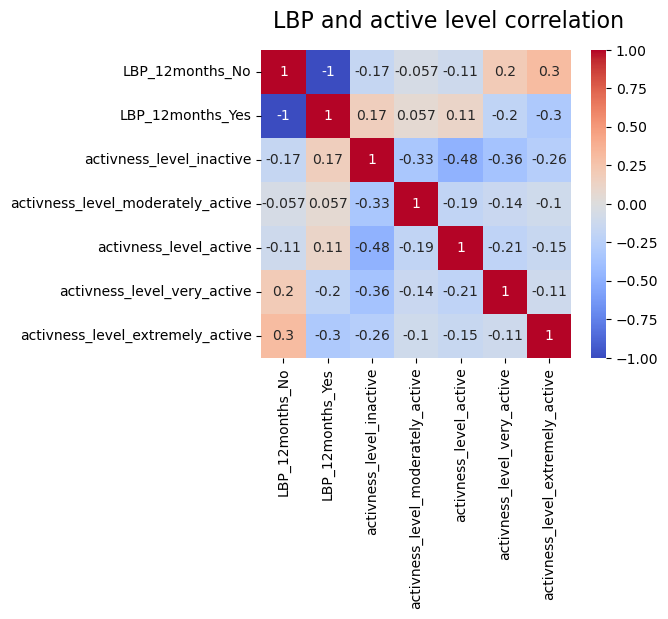

In [728]:
newdummi=pd.get_dummies(spine_df,columns=["activness_level","LBP_12months"])
newdummi.columns
interest=['LBP_12months_No', 'LBP_12months_Yes','activness_level_inactive',
       'activness_level_moderately_active', 'activness_level_active',
       'activness_level_very_active','activness_level_extremely_active']
matrix=newdummi[interest].corr()
fig, ax = plt.subplots(figsize=(5, 4))
fig.suptitle('LBP and active level correlation', fontsize=16)

sns.heatmap(matrix, cmap='coolwarm', center=0, annot = True)

In [729]:
spine_df.groupby('activness_level')['LBP_12months'].value_counts()

activness_level    LBP_12months
active             Yes             33
                   No              12
extremely_active   No              14
                   Yes              2
inactive           Yes             68
                   No              26
moderately_active  Yes             17
                   No               7
very_active        No              17
                   Yes             11
Name: count, dtype: int64

<Axes: xlabel='activness_level', ylabel='count'>

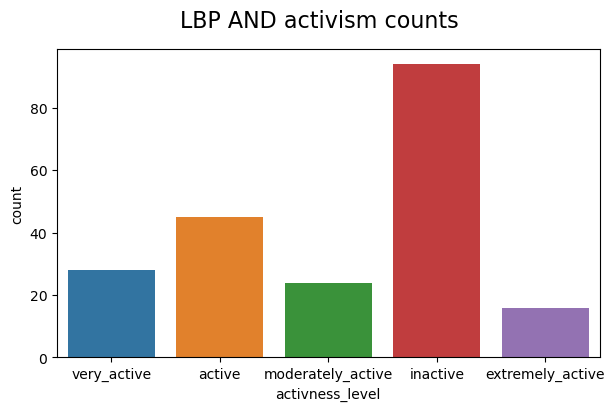

In [730]:
fig, ax = plt.subplots(figsize=(7, 4))
fig.suptitle('LBP AND activism counts', fontsize=16)

sns.countplot(data=spine_df,x='activness_level')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\2325235691.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=spine_df, x='activness_level', y='LBP_12monthsbool',ci=None)


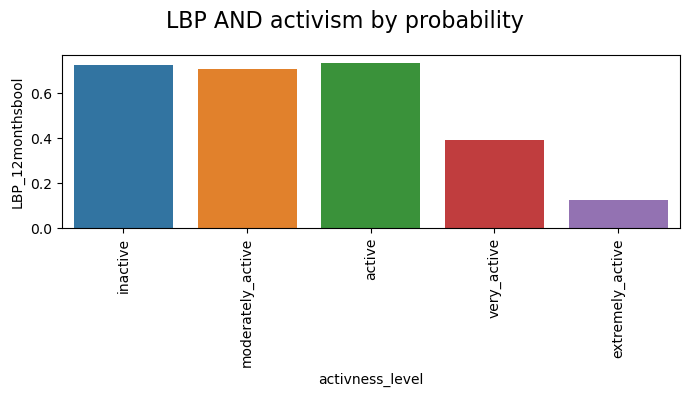

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [731]:
spine_df['activness_level']
order1=['inactive','moderately_active','active','very_active','extremely_active']
spine_df['activness_level'].value_counts()
spine_df['activness_level'] = pd.Categorical(spine_df['activness_level'], categories=order1, ordered=True)
fig, ax = plt.subplots(figsize=(7, 4))
fig.suptitle('LBP AND activism by probability', fontsize=16)
sns.barplot(data=spine_df, x='activness_level', y='LBP_12monthsbool',ci=None)
plt.xticks( rotation=90)  
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 5))



<font size=3>__from the heatmap and the histogram we understand that students who are more above active apperantly decrease the chances to suffer from LBP__

<font size=5>__Smoking and LBP__

In [732]:
spine_df.groupby("Smoking_habit")['LBP_12months'].value_counts()

Smoking_habit  LBP_12months
Ex-smoker      No                5
               Yes               3
Never smoked   Yes             108
               No               64
Smoker         Yes              20
               No                7
Name: count, dtype: int64

Text(0.5, 0.98, 'LBP and smoking connection ')

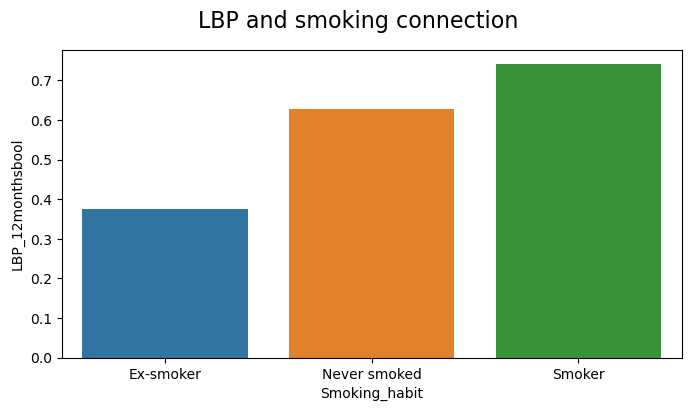

In [733]:
fig, ax = plt.subplots(figsize=(8, 4))
smoking_lbp = spine_df.groupby('Smoking_habit')['LBP_12monthsbool'].mean().reset_index()
smoking_lbp
# fig, ax = plt.subplots(figsize=(8, 4))

# Create the bar plot
sns.barplot(data=smoking_lbp, x='Smoking_habit', y='LBP_12monthsbool', ax=ax)
fig.suptitle('LBP and smoking connection ' , fontsize=16)



<Axes: xlabel='Smoking_habit', ylabel='count'>

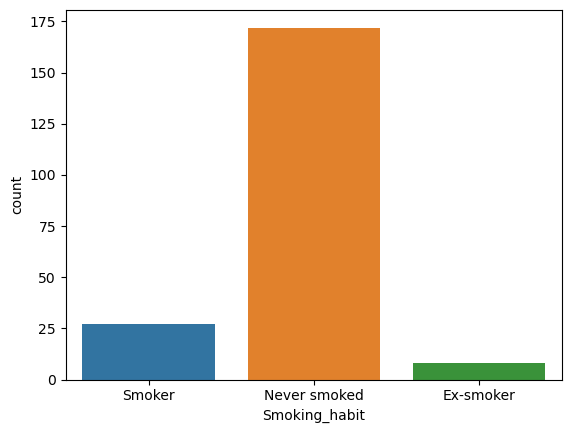

In [734]:
sns.countplot(data=spine_df,x='Smoking_habit')

<font size=3> __sub conclusion:we saw that the percenteges of smokers are higher than the other group but,because the unsmoker group is much bigger we cannot assume that smoking increase chances for LBP among students__

<font size=5>__Variety of students Treatments and the effection on LBP__

In [735]:
spine_df['Treatments'].value_counts().reset_index()

,Treatments,count
0,No treatment,93
1,unreported,53
2,Opioid painkillers,34
3,Exercise therapy,14
4,Opioid+Exercise,8
5,Opioid+injection,3
6,Steroid injections,2


C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\3420979135.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered,x='Treatments',y='LBP_12monthsbool',ci=None)


Text(0, 0.5, 'Percentage of LBP in the last 12 months')

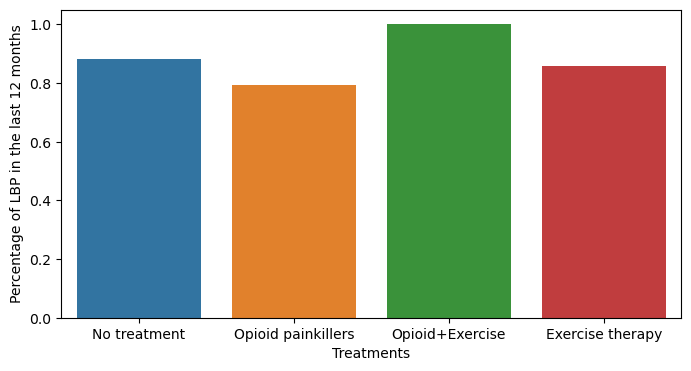

In [736]:
filtered = spine_df[~spine_df['Treatments'].isin(["unreported", 'Opioid+injection', 'Steroid injections'])]
filtered.groupby('Treatments')['LBP_12monthsbool'].mean().reset_index()
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=filtered,x='Treatments',y='LBP_12monthsbool',ci=None)
ax.set_ylabel('Percentage of LBP in the last 12 months')




<font size=4>how does it make sense that all group are with high percentages of LBP

In [737]:
spine_df.groupby('Treatments')['LBP_12months'].value_counts()


Treatments          LBP_12months
Exercise therapy    Yes             12
                    No               2
No treatment        Yes             82
                    No              11
Opioid painkillers  Yes             27
                    No               7
Opioid+Exercise     Yes              8
Opioid+injection    Yes              2
                    No               1
Steroid injections  No               2
unreported          No              53
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\3344111368.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered,x='Treatments',y='LBP_12monthsbool',ci=None)


Text(0, 0.5, 'Percentage of LBP in the last 12 months')

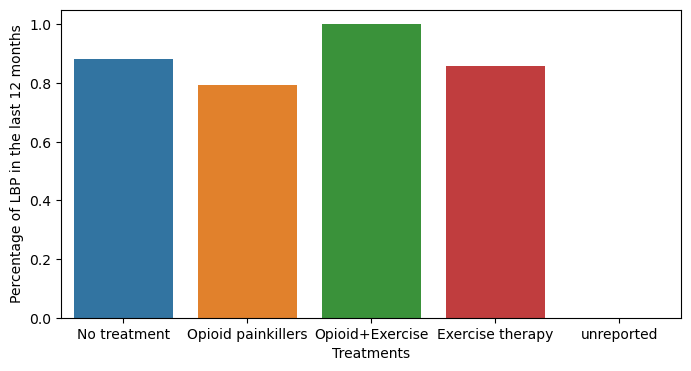

In [738]:
filtered = spine_df[~spine_df['Treatments'].isin(['Opioid+injection', 'Steroid injections'])]
filtered.groupby('Treatments')['LBP_12monthsbool'].mean().reset_index()
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=filtered,x='Treatments',y='LBP_12monthsbool',ci=None)
ax.set_ylabel('Percentage of LBP in the last 12 months')




<font size=4>__from the graph we can see that there isnt affection for The variety of treatments on deacrising the LBP__


<font size=5>__does there is a reason that treatments or no treatments are suffer relatively high from LBP?__

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


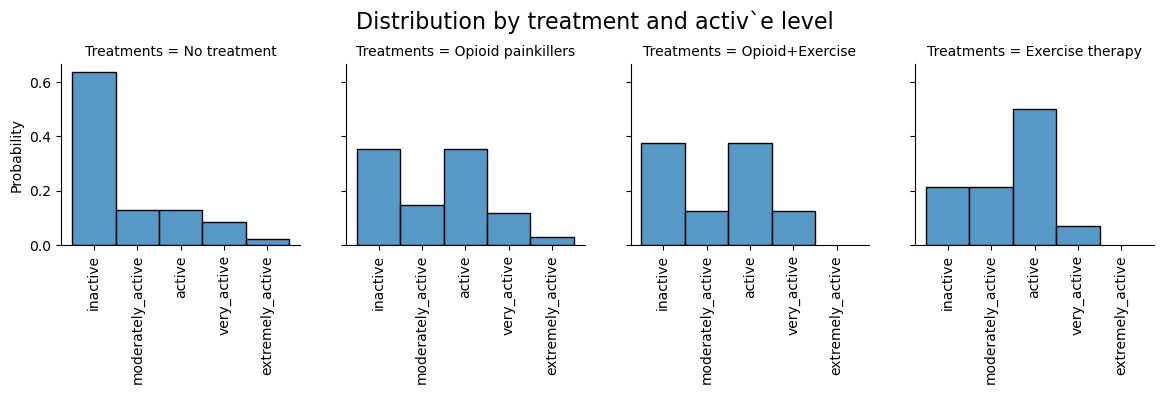

In [739]:
filtered = spine_df[~spine_df['Treatments'].isin( ['unreported','Opioid+injection', 'Steroid injections'])]
g = sns.FacetGrid(filtered, col='Treatments')
g.map_dataframe(sns.histplot, x='activness_level', multiple="stack", stat='probability')
g.fig.suptitle('Distribution by treatment and activ`e level', fontsize=16)
plt.subplots_adjust(top=0.8)  
g.set_axis_labels("")
g.set_xticklabels(rotation=90)

__sub-conclusion:itis possibole that the treatments arent affective but also most of the students arent actives,about the untreatment grouo they are just lazy__
we will continue to check it:)

<font size=4>__does seating effect LBP__?

In [740]:
spine_df.columns

Index(['Educational_level', 'Gender', 'Age', 'Age_group', 'Height',
       'Weight (kg)', 'BMI', 'BMI_Range', 'Currently_LBP', 'LBP_6months',
       'LBP_12months', 'LBP_first_time', 'Duration_in_12_months',
       'LBP_episodes', 'Causes', 'Aggravating_factors', 'Leg_pain',
       'Treatments', 'Do_exercise', 'Physical_activity_Frequency',
       'Smoking_habit', 'Sitting_time', 'Chair_type', 'Adjustable_back',
       'Adjustable_sitting', 'Most_activity', 'Rest_time', 'LBP_12monthsbool',
       'perfect_chair', 'semi_perfect', 'activness_level'],
      dtype='object')

<Axes: >

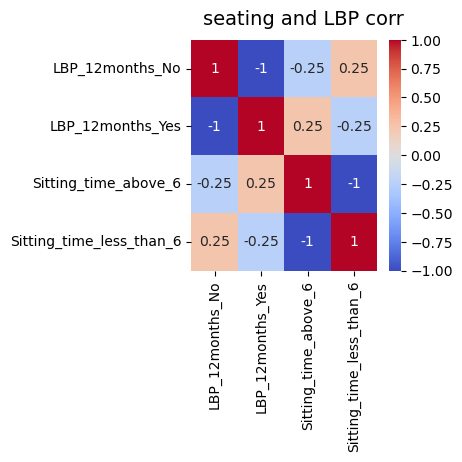

In [741]:
newdummi2=pd.get_dummies(spine_df,columns=['Sitting_time',"LBP_12months"])
newdummi2.columns
interest2=['LBP_12months_No','LBP_12months_Yes','Sitting_time_above_6','Sitting_time_less_than_6']
matrix2=newdummi2[interest2].corr()
fig, ax = plt.subplots(figsize=(3, 3))
fig.suptitle('seating and LBP corr', fontsize=14)
sns.heatmap(matrix2, cmap='coolwarm', center=0, annot = True)


In [742]:
spine_df.columns

Index(['Educational_level', 'Gender', 'Age', 'Age_group', 'Height',
       'Weight (kg)', 'BMI', 'BMI_Range', 'Currently_LBP', 'LBP_6months',
       'LBP_12months', 'LBP_first_time', 'Duration_in_12_months',
       'LBP_episodes', 'Causes', 'Aggravating_factors', 'Leg_pain',
       'Treatments', 'Do_exercise', 'Physical_activity_Frequency',
       'Smoking_habit', 'Sitting_time', 'Chair_type', 'Adjustable_back',
       'Adjustable_sitting', 'Most_activity', 'Rest_time', 'LBP_12monthsbool',
       'perfect_chair', 'semi_perfect', 'activness_level'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\2032585621.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=spine_df,x='Sitting_time',y='LBP_12monthsbool',ci=None)


Text(0.5, 1.0, 'distributtion of siiting time and LBP')

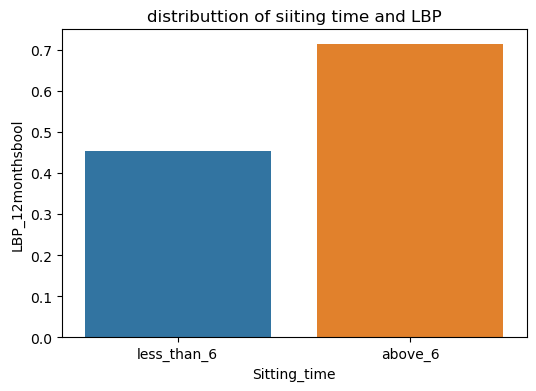

In [743]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=spine_df,x='Sitting_time',y='LBP_12monthsbool',ci=None)
ax.set_title("distributtion of siiting time and LBP")

<font size=5>__we can see direct connection between seating time and LBP__

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


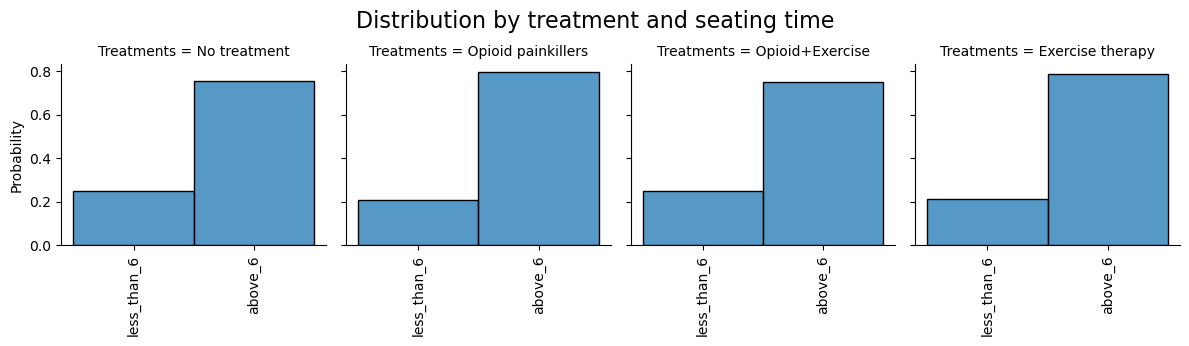

In [744]:
g = sns.FacetGrid(filtered, col='Treatments')
g.map_dataframe(sns.histplot, x='Sitting_time', multiple="stack", stat='probability')
g.fig.suptitle('Distribution by treatment and seating time', fontsize=16)
plt.subplots_adjust(top=0.8)  
g.set_axis_labels("")
g.set_xticklabels(rotation=90)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


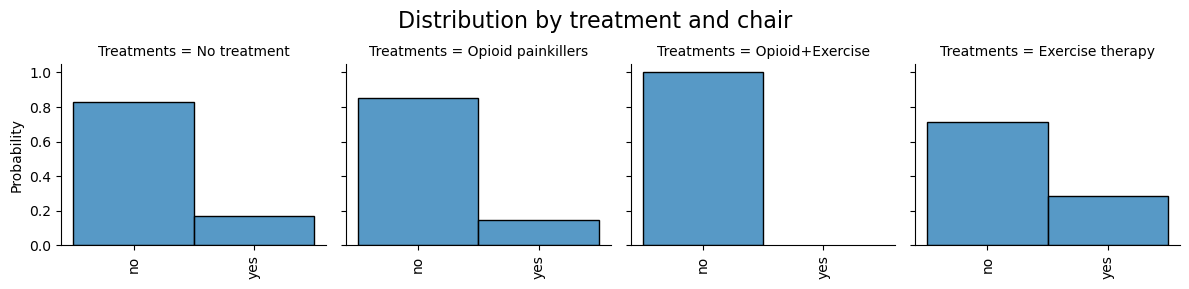

In [745]:
g = sns.FacetGrid(filtered, col='Treatments')
g.map_dataframe(sns.histplot, x='perfect_chair', multiple="stack", stat='probability',)
g.fig.suptitle('Distribution by treatment and chair', fontsize=16)
plt.subplots_adjust(top=0.8)  
g.set_axis_labels("")
g.set_xticklabels(rotation=90)

<font size=5>__we understand that the student with specifi treatment are also 'luck' of life style,most of them are lazy,seat more than 6 hours a day and dont seat on perfect chairs,this can explain why most of them suffer from LBP__
    

<FONT SIZE=6>Main Conclusion 2:Smoking isnt effect LBP among students,chair type seating time and active level gets big impact on the LBP chances

<font size=5,style color=BLUE>__Conclusion number 3:there is a connection between the students year and the chances to suffer from LBP__?
    
   
    
    

<Axes: >

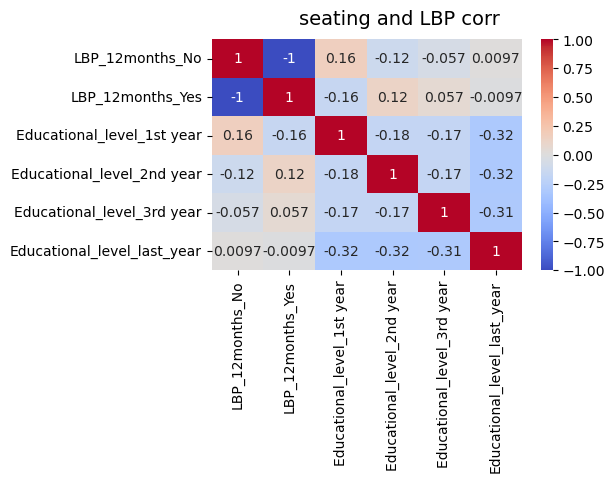

In [746]:
newdummi3=pd.get_dummies(spine_df,columns=['Educational_level',"LBP_12months"])
newdummi3.columns
interest2=['LBP_12months_No','LBP_12months_Yes','Educational_level_1st year', 'Educational_level_2nd year',
       'Educational_level_3rd year','Educational_level_last_year']
matrix3=newdummi3[interest2].corr()
fig, ax = plt.subplots(figsize=(5, 3))
fig.suptitle('seating and LBP corr', fontsize=14)

sns.heatmap(matrix3, cmap='coolwarm', center=0, annot = True)


In [747]:
styear1=spine_df[spine_df["Educational_level"]=="1st year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()
styear2=spine_df[spine_df["Educational_level"]=="2nd year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()
styear3=spine_df[spine_df["Educational_level"]=="3rd year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()
styearfinal=spine_df[spine_df["Educational_level"]=="last_year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()

styearfinal

,Educational_level,LBP_12months,count
0,last_year,Yes,47
1,last_year,No,28


Text(0.5, 0.98, 'distribution of students by year')

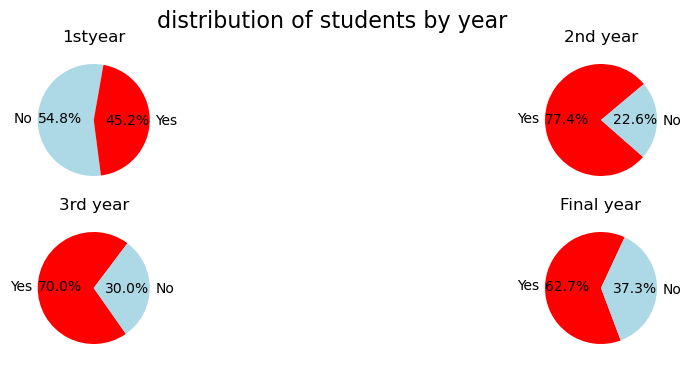

In [748]:
fig, ax = plt.subplots(2,2,figsize=(12, 4))
ax[0,0].pie(styear1["count"], labels=styear1["LBP_12months"].values, autopct='%1.1f%%',colors=["lightblue","red"],startangle=80) 
ax[0,0].set_title("1styear")
ax[0,1].pie(styear2["count"], labels=styear2["LBP_12months"].values, autopct='%1.1f%%',colors=["red","lightblue"],startangle=40)  
ax[0,1].set_title("2nd year")
ax[1,0].pie(styear3["count"], labels=styear3["LBP_12months"].values, autopct='%1.1f%%', colors=["red","lightblue"],startangle=53) 
ax[1,0].set_title("3rd year")
ax[1,1].pie(styearfinal["count"], labels=styearfinal["LBP_12months"].values, autopct='%1.1f%%',colors=["red","lightblue"],startangle=65)
ax[1,1].set_title("Final year")
fig.suptitle('distribution of students by year' , fontsize=16)






<font size=3>__we can see that the first year students are less likely to suffer,lets check it by 5 categories that we have founded affectable:"Perfect chair,seatingtime,activism,gender and we will check if they had some kind of treatments__.

<Axes: xlabel='Educational_level', ylabel='count'>

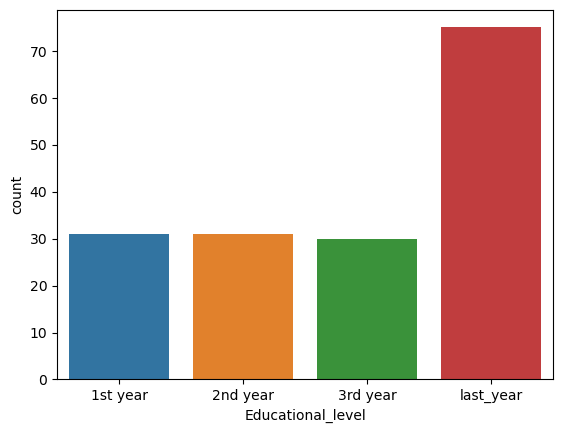

In [754]:
sns.countplot(data=spine_df,x='Educational_level')

<Axes: xlabel='Educational_level', ylabel='count'>

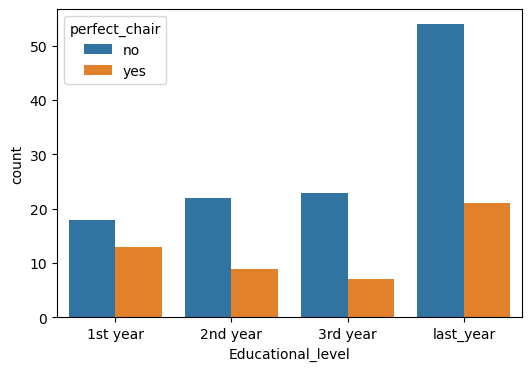

In [753]:
order=["1st year","2nd year","3rd year",'last_year']
spine_df['Educational_level'] = pd.Categorical(spine_df['Educational_level'], categories=order)
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=spine_df,x='Educational_level',hue='perfect_chair')



ValueError: Could not interpret value `activness_level` for parameter `x`

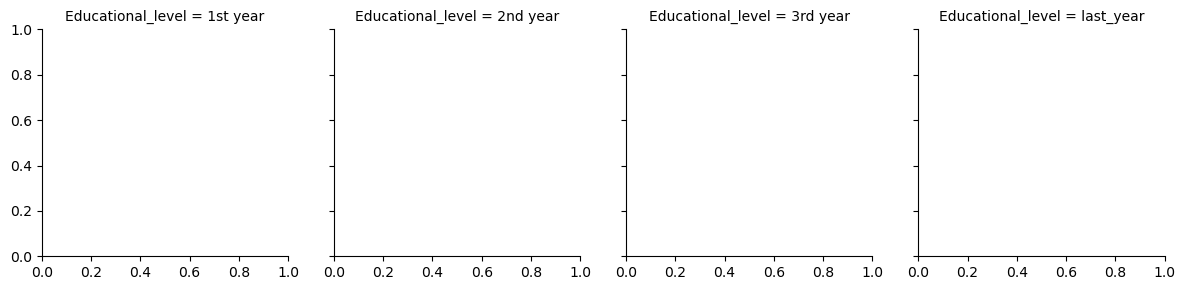

In [113]:
order=["1st year","2nd year","3rd year",'last_year']
g = sns.FacetGrid(spine_df, col='Educational_level',col_order=order)
g.map_dataframe(sns.histplot, x='activness_level',multiple="stack",stat="percent")
g.fig.suptitle('Distribution by year and active level', fontsize=16)
plt.subplots_adjust(top=0.8)  
g.set_xticklabels(rotation=90)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


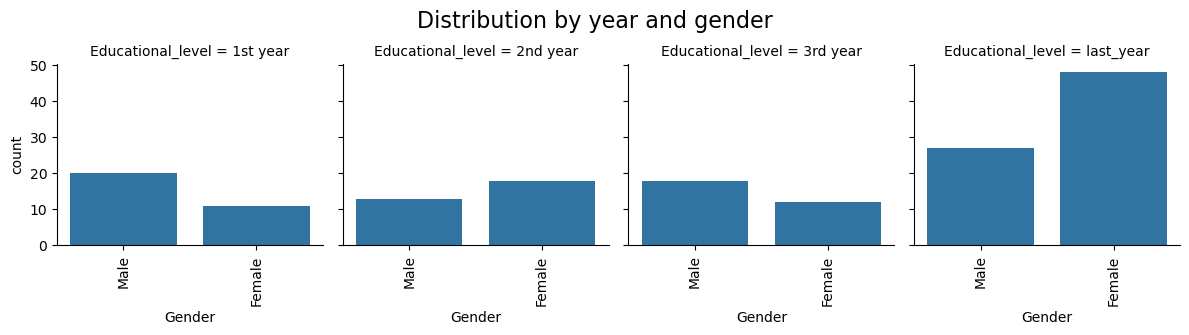

In [104]:
order=["1st year","2nd year","3rd year",'last_year']

g = sns.FacetGrid(spine_df, col='Educational_level',col_order=order)
g.map_dataframe(sns.countplot, x="Gender")
plt.subplots_adjust(top=0.8)  
g.fig.suptitle('Distribution by year and gender', fontsize=16)

g.set_xticklabels(rotation=90)


In [ ]:
g = sns.FacetGrid(spine_df, col='Educational_level',col_order=order)
g.map_dataframe(sns.histplot, x="Sitting_time",stat="percent")
g.fig.suptitle('Distribution by year and seating time', fontsize=16)
plt.subplots_adjust(top=0.8) 
g.set_xticklabels(rotation=90)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


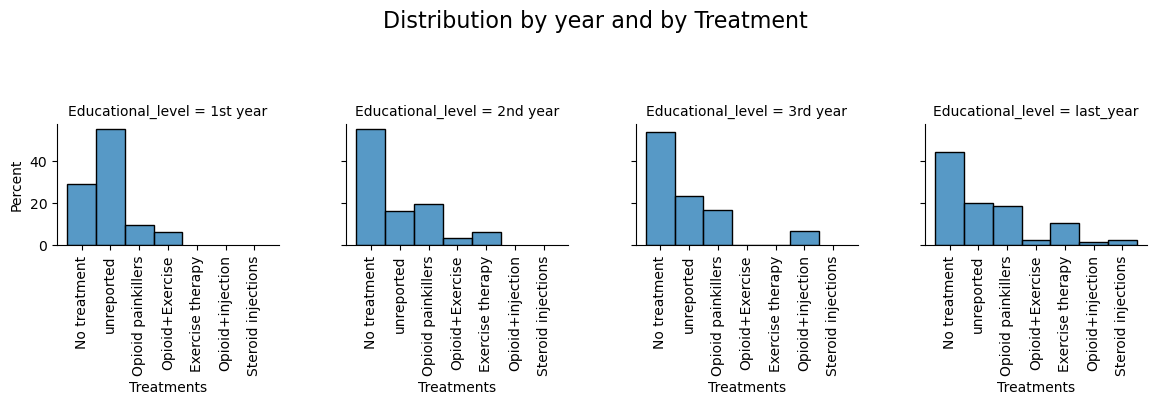

In [114]:
order=["1st year","2nd year","3rd year",'last_year']
g = sns.FacetGrid(spine_df, col='Educational_level',col_order=order)
fig.suptitle('distribution by treatment' , fontsize=16)

g.map_dataframe(sns.histplot, x='Treatments',multiple="stack",stat="percent")
g.set_xticklabels(rotation=90)
g.fig.suptitle('Distribution by year and by Treatment', fontsize=16)
plt.subplots_adjust(top=0.6)  



<font size=5,font color=blue>__main conclusion number 3: as we saw the first year students are the less likely to belong to the 'no treat,emt group',they are the most active compared to the others groups,60 % of them seats less then 6 hours a day and most of them are males which we have found that they are less likely to suffer, if we combined all the data toghether thats can explain why the first year students is the group with the least students who suffer from LBP__